In [ ]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Create a DataFrame for EDA
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train Logistic Regression without PCA
baseline_model = LogisticRegression(max_iter=10000)
baseline_model.fit(X_train, y_train)

# Predict and evaluate the baseline model
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate performance
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline, average='weighted')
baseline_recall = recall_score(y_test, y_pred_baseline, average='weighted')

print(f"Baseline Accuracy: {baseline_accuracy}")
print(f"Baseline Precision: {baseline_precision}")
print(f"Baseline Recall: {baseline_recall}")


Baseline Accuracy: 0.9629629629629629
Baseline Precision: 0.966183574879227
Baseline Recall: 0.9629629629629629


In [ ]:
from sklearn.decomposition import PCA

# Function to apply PCA and train the model
def apply_pca_and_train(n_components):
    pca = PCA(n_components=n_components)

    # Apply PCA to training data
    X_train_pca = pca.fit_transform(X_train)

    # Apply the same PCA transformation to test data
    X_test_pca = pca.transform(X_test)

    # Train Logistic Regression on PCA-reduced data
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train_pca, y_train)

    # Predict and evaluate the model
    y_pred_pca = model.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred_pca)
    precision = precision_score(y_test, y_pred_pca, average='weighted')
    recall = recall_score(y_test, y_pred_pca, average='weighted')

    return accuracy, precision, recall

# Test different numbers of components
components_list = [2, 5, 10]
results = {}

for n in components_list:
    accuracy, precision, recall = apply_pca_and_train(n)
    results[n] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}
    print(f"PCA with {n} components: Accuracy={accuracy}, Precision={precision}, Recall={recall}")


PCA with 2 components: Accuracy=0.6851851851851852, Precision=0.6736111111111112, Recall=0.6851851851851852
PCA with 5 components: Accuracy=0.9629629629629629, Precision=0.9647793726741095, Recall=0.9629629629629629
PCA with 10 components: Accuracy=0.9629629629629629, Precision=0.966183574879227, Recall=0.9629629629629629


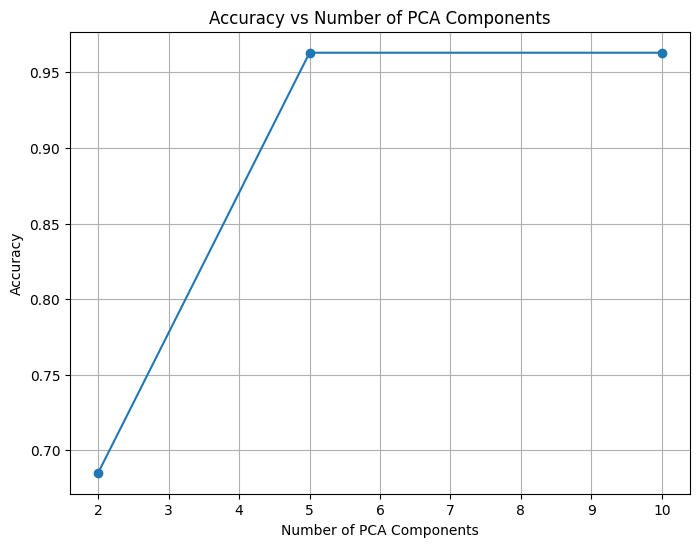

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy vs number of PCA components
components = list(results.keys())
accuracies = [results[n]['Accuracy'] for n in components]

plt.figure(figsize=(8, 6))
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
